<h1>Predictive analytics with Airbnb data</h1>

<p>
    In this code I use the CRISP-DM method learned in class, in order to describe analytically the 
    data set used and to define a prediction about the prices of the service, based on selected parameters.
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_listings = pd.read_csv('./dataset/listings.csv')
df_calendar = pd.read_csv('./dataset/calendar.csv')
df_reviews = pd.read_csv('./dataset/reviews.csv')



<h2 id='main-title-understand-data'>A look at the Airbnb data</h2>

In this section we will look at the airbnb dataset to get a better understanding of the characteristics of the information.

<h3>Shapes and stats</h3>

In [2]:
# Shapes
print('df_listings shape:', df_listings.shape)
print('df_calendar shape:', df_calendar.shape)
print('df_reviews shape:', df_reviews.shape)
# Stats
df_listings.describe()

df_listings shape: (3818, 92)
df_calendar shape: (1393570, 4)
df_reviews shape: (84849, 6)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [3]:
df_listings.describe(include="all")

# the dataset contains categorical and numerical variables.

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/241032,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


<h3>Which columns had no missing values?</h3>

In [4]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
listings_columns_without_nulls = set(df_listings.columns[df_listings.notna().all()])
print(sorted(list(listings_columns_without_nulls)))

['accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bed_type', 'calculated_host_listings_count', 'calendar_last_scraped', 'calendar_updated', 'cancellation_policy', 'city', 'country', 'country_code', 'description', 'experiences_offered', 'extra_people', 'guests_included', 'has_availability', 'host_id', 'host_url', 'host_verifications', 'id', 'instant_bookable', 'is_location_exact', 'jurisdiction_names', 'last_scraped', 'latitude', 'listing_url', 'longitude', 'market', 'maximum_nights', 'minimum_nights', 'name', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'number_of_reviews', 'picture_url', 'price', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license', 'room_type', 'scrape_id', 'smart_location', 'state', 'street']


<h3>Which columns had missing values?</h3>

In [6]:
print("Columns with missing values:")
listings_columns_with_nulls = set(df_listings.columns[df_listings.isna().mean() > 0])
print(sorted(list(listings_columns_with_nulls)))

print("\n")
print("Which columns have the most missing values? ")
print("\n")

# I check which listings columns have the most missing values (> .25)
listings_columns_with_nulls = set(df_listings.columns[df_listings.isna().mean() > .25])
print("Lost more than 25% of data:\n", sorted(list(listings_columns_with_nulls)))
print("")

# I check which listings columns have the most missing values (> .50)
listings_columns_with_nulls = set(df_listings.columns[df_listings.isna().mean() > .50])
print("Lost more than 50% of data:\n", sorted(list(listings_columns_with_nulls)))
print("")

# I check which listings columns have the most missing values (> .75)
listings_columns_with_nulls = set(df_listings.columns[df_listings.isna().mean() > .75])
print("Lost more than 75% of data:\n", sorted(list(listings_columns_with_nulls)))
print("")

Columns with missing values:
['bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'first_review', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'last_review', 'license', 'medium_url', 'monthly_price', 'neighborhood_overview', 'neighbourhood', 'notes', 'property_type', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'reviews_per_month', 'security_deposit', 'space', 'square_feet', 'summary', 'thumbnail_url', 'transit', 'weekly_price', 'xl_picture_url', 'zipcode']


Which columns have the most missing values? 


Lost more than 25% of data:
 ['cleaning_fee', 'license', 'monthly_price', 'neighborho

<h3>Charts</h3>

Only 20% are superhost!


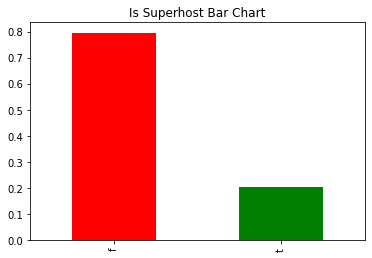

In [7]:
# host_is_superhost chart
host_is_superhost_vals = df_listings.host_is_superhost.value_counts()

(host_is_superhost_vals/df_listings.shape[0]).plot(kind="bar", color=list('rgbkymc'));
plt.title("Is Superhost Bar Chart");

print("Only 20% are superhost!")

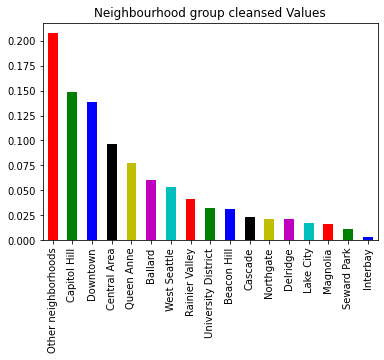

In [8]:
# neighbourhood_group_cleansed chart
neighbourhood_group_cleansed_vals = df_listings.neighbourhood_group_cleansed.value_counts()

(neighbourhood_group_cleansed_vals/df_listings.shape[0]).plot(kind="bar", color=list('rgbkymc'));
plt.title("Neighbourhood group cleansed Values");

Approximately 90% of the hosting opportunities in Seattle are in houses or apartments!


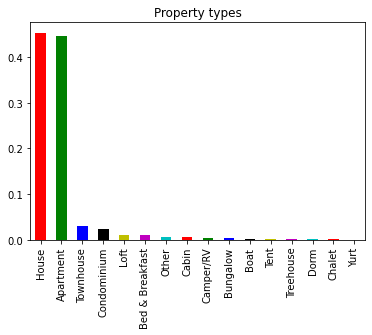

In [9]:
# property_type chart
property_types_vals = df_listings.property_type.value_counts()

(property_types_vals/df_listings.shape[0]).plot(kind="bar", color=list('rgbkymc'));
plt.title("Property types");

print("Approximately 90% of the hosting opportunities in Seattle are in houses or apartments!")

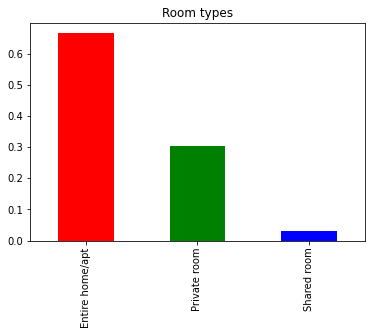

In [10]:
# room_type chart
room_types_vals = df_listings.room_type.value_counts()

(room_types_vals/df_listings.shape[0]).plot(kind="bar", color=list('rgbkymc'));
plt.title("Room types");

<h2 id='main-title-understand-data'>Reviewing the data</h2>

<div>
    At this point, I went through each .csv and found that listings.csv contains the main information of each place that is registered with Airbnb, and calendar.csv and reviews.csv contain data starting from customer activity.
</div>

<div>
    <ol>
        <li>
            <span><b>Listings:</b></span>
            <br />
            <div>
                For this file, I found it interesting to review the following columns:
                <ol>
                    <li>host_response_rate: type: Numeric</li>
                    <li>host_is_superhost: type: categorical</li>
                    <li>neighbourhood_group_cleansed: type: categorical (without missing values)</li>
                    <li>property_type: type: categorical</li>
                    <li>room_type: type: categorical (without missing values)</li>
                    <li>accommodates: type: Numeric (without missing values)</li>
                    <li>bathrooms: type: Numeric</li>
                    <li>bedrooms: type: Numeric</li>
                    <li>beds: type: Numeric</li>
                    <li>bed_type: type: categorical (without missing values)</li>
                    <li>amenities: type: string (without missing values)</li>
                    <li>guests_included: type: Numeric (without missing values)</li>
                    <li>extra_people: type: Numeric (without missing values)</li>
                    <li>reviews_per_month: type: Numeric</li>
                    <li>price: type: Numeric (without missing values)</li>
                </ol>
            </div>
        </li>
    </ol>
</div>


<h3>Pre-processing of data</h3>

In [11]:
# Replace '$' character in price column and cast to float
df_listings['price'] = df_listings['price'].str.replace('$','', regex=False)
df_listings['price'] = df_listings['price'].str.replace(',','', regex=False)
df_listings = df_listings.astype({'price': float})

<h3>Exploring possible price relationships</h3>

In [12]:
# Relationship between price and if the host is a superhost
df_listings[['host_is_superhost', 'price']].groupby(['host_is_superhost']).mean()['price'].sort_values()

# Averages indicate that superhost-rated hosts are worth more

host_is_superhost
f    127.391376
t    130.140103
Name: price, dtype: float64

In [13]:
# Relationship between price and neighbourhood_group_cleansed
df_listings[['neighbourhood_group_cleansed', 'price']].groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values()

# this column should be selected, as it significantly affects the value of the price.

neighbourhood_group_cleansed
Delridge                83.278481
Northgate               88.550000
Rainier Valley          91.899371
Lake City               92.671642
University District     93.639344
Beacon Hill             94.669492
Seward Park            108.477273
Interbay               109.727273
Other neighborhoods    119.968514
Ballard                124.682609
Central Area           128.338753
Capitol Hill           130.592593
Cascade                140.101124
West Seattle           141.359606
Downtown               154.405660
Queen Anne             157.223729
Magnolia               177.672131
Name: price, dtype: float64

In [14]:
# Relationship between price and property_type
df_listings[['property_type', 'price']].groupby(['property_type']).mean()['price'].sort_values()

# this column should be selected, as it significantly affects the value of the price.

property_type
Dorm                39.500000
Tent                54.000000
Other               94.681818
Chalet              98.500000
Yurt               100.000000
Treehouse          101.000000
Cabin              104.666667
Bed & Breakfast    112.054054
Bungalow           115.615385
Camper/RV          120.461538
Apartment          122.932670
Townhouse          129.457627
House              132.351414
Loft               135.700000
Condominium        151.109890
Boat               282.375000
Name: price, dtype: float64

In [15]:
# Relationship between price and room_type
df_listings[['room_type', 'price']].groupby(['room_type']).mean()['price'].sort_values()

# this column should be selected, as it significantly affects the value of the price.

room_type
Shared room         47.547009
Private room        75.044828
Entire home/apt    155.843369
Name: price, dtype: float64

In [16]:
# Relationship between price and security_deposit
df_listings[['security_deposit', 'price']].groupby(['security_deposit']).mean()['price'].sort_values()

security_deposit
$295.00       30.666667
$185.00       49.000000
$195.00       79.000000
$220.00       85.000000
$180.00       88.000000
$120.00       88.333333
$149.00       90.000000
$225.00       92.000000
$99.00        94.400000
$375.00       95.000000
$95.00        99.863636
$650.00      100.000000
$100.00      104.893678
$115.00      105.000000
$350.00      107.012658
$450.00      107.600000
$109.00      109.000000
$175.00      111.666667
$125.00      113.166667
$150.00      115.392670
$200.00      126.363958
$140.00      130.000000
$134.00      134.000000
$1,200.00    139.500000
$250.00      143.060345
$199.00      154.333333
$400.00      155.040816
$300.00      162.527660
$550.00      180.000000
$800.00      185.500000
$500.00      189.173913
$700.00      210.000000
$449.00      249.000000
$750.00      256.571429
$5,000.00    275.000000
$1,500.00    277.545455
$2,500.00    305.000000
$600.00      314.888889
$995.00      315.000000
$2,000.00    317.750000
$360.00      333.000000

<h2>Business and data Understanding</h2>

<div>
    <h3>Business questions</h3>
    <ul>
        <li>What are the most common amenities offered at the host sites? how does it affect the price of host?</li>
        <li>What is the month with the most booked reservations in Seattle, and by what percentage do prices increase?</li>
        <li>What relates to price?</li>
    </ul>
</div>

<h2>Data Preparation</h2>

<h3>What are the most common amenities offered at the host sites? how does it affect the price of host?</h3>

In [17]:
# Each detail of the hosting site integrates in a single field all the amenities it offers.
# I need a dataframe that lists all the amenities with the respective counts of how many places offer them.
from utils import count_subitems

# Create new dataframe and clean up unwanted characters
df_amenities = df_listings['amenities']
df_amenities = df_amenities.str.replace('{', '', regex=False)
df_amenities = df_amenities.str.replace('}', '', regex=False)
df_amenities = df_amenities.str.replace('"', '', regex=False)

# Obtain all the amenities with their respective counters of the times found in the whole column.
amenities_with_counts = count_subitems(list(df_amenities))

# Create dataframe
df_amenities = pd.DataFrame(pd.Series(amenities_with_counts)).reset_index()
df_amenities.columns = ["amenity", "count"]
df_amenities.sort_values("count", ascending=False, inplace=True)
df_amenities = df_amenities.reset_index()
df_amenities["percentage"] = df_amenities["count"] / np.sum(df_amenities["count"])

amenities_list = list(df_amenities["amenity"])
df_amenities

,index,amenity,count,percentage
0,3,Wireless Internet,3666,0.066921
1,6,Heating,3626,0.066191
2,5,Kitchen,3422,0.062467
3,12,Smoke Detector,3280,0.059875
4,17,Essentials,3236,0.059072
5,9,Dryer,2996,0.054690
6,8,Washer,2991,0.054599
7,2,Internet,2810,0.051295
8,24,Shampoo,2669,0.048721
9,0,TV,2573,0.046969


In [18]:
from utils import items_statistics

df_all = items_statistics(df_listings, 'amenities', 'price', amenities_list)
df_all.sort_values('mean', ascending=False)

,amenities,sum,total,squares,mean,var,std,lower_95,upper_95
37,Doorman,17022.0,85,4606112.0,200.258824,14085.956540,118.684273,175.027515,225.490132
35,Pool,27172.0,159,6707178.0,170.893082,12979.064040,113.925695,153.184687,188.601477
31,Hot Tub,50610.0,303,13449188.0,167.029703,16487.837402,128.404974,152.571424,181.487982
34,Suitable for Events,33560.0,209,9175462.0,160.574163,18117.670337,134.601896,142.325371,178.822954
29,Gym,69105.0,442,15298977.0,156.346154,10168.950313,100.841213,146.944960,165.747348
15,Cable TV,224713.0,1446,50185065.0,155.403181,10555.981982,102.742309,150.107507,160.698855
24,Air Conditioning,103782.0,677,24070072.0,153.296898,12054.081719,109.791082,145.026455,161.567342
16,Indoor Fireplace,134980.0,886,33133748.0,152.347630,14187.206467,119.110060,144.504532,160.190728
13,Family/Kid Friendly,295971.0,1963,65990105.0,150.774834,10883.915678,104.326007,146.159656,155.390013
28,Pets Allowed,69500.0,472,16271624.0,147.245763,12792.465024,113.103780,137.041957,157.449569


<h3>What is the month with the most booked reservations in Seattle, and by what percentage do prices increase?</h3>

In [19]:
# Replace '$' character in price column and cast to float
df_calendar['price'] = df_calendar['price'].str.replace('$','', regex=False)
df_calendar['price'] = df_calendar['price'].str.replace(',','', regex=False)
df_calendar = df_calendar.astype({'price': float})
df_calendar['date'] = df_calendar.date.str.slice(0, 7)

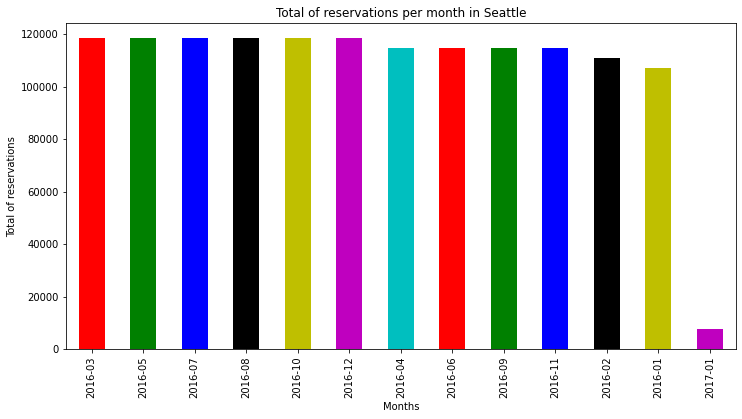

In [20]:
date_counts = df_calendar.date.value_counts()
plt.figure(figsize=(12, 6))
(date_counts).plot(kind="bar", color=list('rgbkymc'));
plt.ylabel("Total of reservations")
plt.xlabel("Months")
plt.title("Total of reservations per month in Seattle");

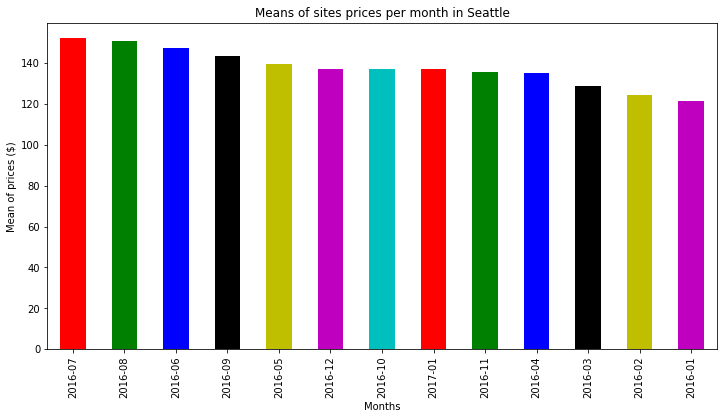

In [21]:
dates_with_prices = df_calendar[['date', 'price']].groupby(['date']).mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
dates_with_prices.plot(kind="bar", color=list('rgbkymc'));
plt.ylabel("Mean of prices ($)")
plt.xlabel("Months")
plt.title("Means of sites prices per month in Seattle");

In [22]:
hosts_with_prices = df_calendar.groupby(['listing_id', 'date']).mean()['price'].reset_index()
hosts_with_prices = hosts_with_prices.dropna()
hosts_with_prices = hosts_with_prices.sort_values('price', ascending=False)

base_prices = []
incrementals = []

for index in range(hosts_with_prices.shape[0]):
    calendar_row = hosts_with_prices.iloc[index, :]
    host_info = df_listings[df_listings['id'] == calendar_row.listing_id].iloc[0]
    base_prices.append(host_info.price)
    incrementals.append((calendar_row.price - host_info.price) / host_info.price)
hosts_with_prices['base_price'] = base_prices
hosts_with_prices['increment'] = incrementals

In [23]:
hosts_with_prices = hosts_with_prices.reset_index()
hosts_with_prices.increment = hosts_with_prices.increment*100
results = hosts_with_prices[['date', 'increment']].groupby('date').mean()['increment']

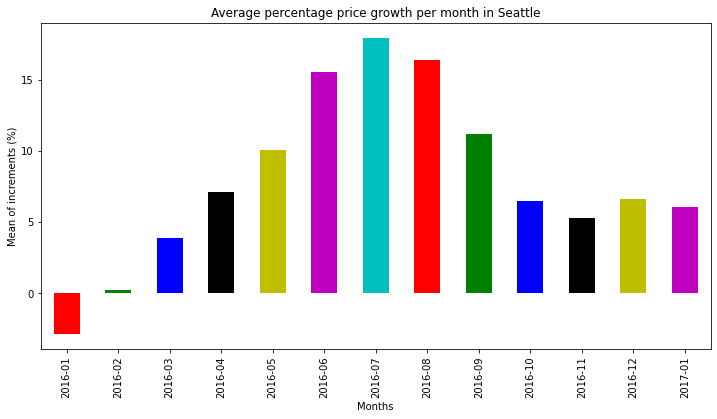

In [24]:
plt.figure(figsize=(12, 6))
results.plot(kind="bar", color=list('rgbkymc'));
plt.ylabel("Mean of increments (%)")
plt.xlabel("Months")
plt.title("Average percentage price growth per month in Seattle");

<h3>What relates to price?</h3>

<h4>Looking at for missing values</h4>

In [25]:
###############
# property_type
###############

# ------ Property type stats
property_types_vals = df_listings.property_type.value_counts()
# print('Property Types values:\n')
# print(property_types_vals)

property_types_sum_nan = df_listings.property_type.isna().sum()
# I checked the property type column and only one row had a NaN value.
# print('Total Nans:', property_types_sum_nan) # One Nan

# I proceeded to review the site description, to see if there was any
# indication of what type of property it is.
# I checked the description of the property and verified that it is a house.
property_types_row_nan = df_listings[df_listings.property_type.isna()]
# print('summary:', property_types_row_nan.summary)

# Manually set value
index = property_types_row_nan.index.values[0]
df_listings.at[index, 'property_type'] = 'House'

property_types_sum_nan = df_listings.property_type.isna().sum()
# print('Total Nans:', property_types_sum_nan) # Zero Nan

In [26]:
##########
# bedrooms
##########

# ------ Bedrooms stats
bedrooms_vals = df_listings.bedrooms.value_counts()
# print('Bedrooms values:\n')
# print(bedrooms_vals)

# I checked the bedrooms column and get 6 rows had a NaN value.
# print('Total Nans:', df_listings.bedrooms.isna().sum()) # 6 Nan's

# Populate with median
df_listings.loc[df_listings.bedrooms.isna(), 'bedrooms'] = df_listings.bedrooms.median()

In [27]:
###########
# bathrooms
###########

# ------ Bedrooms stats
bathrooms_vals = df_listings.bathrooms.value_counts()
# print('Bathrooms values:\n')
# print(bathrooms_vals)

# I checked the bathrooms column and get 16 rows had a NaN value.
# print('Total Nans:', df_listings.bathrooms.isna().sum()) # 16 Nan's

# Populate with median
df_listings.loc[df_listings.bathrooms.isna(), 'bathrooms'] = df_listings.bathrooms.median()

In [28]:
######
# beds
######

# ------ Beds stats
beds_vals = df_listings.beds.value_counts()
# print('Beds values:\n')
# print(beds_vals)

# I checked the beds column and get 1 row had a NaN value.
# print('Total Nans:', df_listings.beds.isna().sum()) # 1 Nan

# Populate with mean
df_listings.loc[df_listings.beds.isna(), 'beds'] = df_listings.beds.mean()

<h3>Format data properly</h3>

In [29]:
##############
# extra_people
##############

# Replace '$' character in 'extra_people' column and cast to float
df_listings['extra_people'] = df_listings['extra_people'].str.replace('$', '', regex=False)
df_listings['extra_people'] = df_listings['extra_people'].str.replace(',', '', regex=False)
df_listings = df_listings.astype({'extra_people': float})

<h3>Processing Categorical variables</h3>

In [30]:
###########
# amenities
###########
# ------ Process amenities to generate a column in the dataset for each amenity
df_listings_amenities = df_listings['amenities'].str.replace('{', '', regex=False)
df_listings_amenities = df_listings_amenities.str.replace('}', '', regex=False)   

# --- Create new columns in listings with default 0
df_temp = pd.DataFrame(columns=amenities_list, index=range(df_listings.shape[0]))
df_temp = df_temp.replace(np.nan, 0)
df_listings = pd.concat([df_listings, df_temp], axis=1)

# --- Updates columns with ones to indicate that the amenity is being offered
for (index, value) in df_listings_amenities.items():
    cleaned_value = value.replace('"', '')
    amenities = cleaned_value.split(',')
    for amenity in amenities:
        if amenity:
            df_listings.at[index, amenity] = 1

In [31]:
df_listings[['property_type', 'room_type', 'price']].groupby(['property_type', 'room_type']).mean()['price'].sort_values()






property_type    room_type      
Tent             Shared room         25.000000
Loft             Shared room         25.000000
Bed & Breakfast  Shared room         30.000000
Townhouse        Shared room         36.500000
Dorm             Shared room         39.500000
Other            Shared room         40.000000
House            Shared room         42.800000
Tent             Private room        50.000000
Treehouse        Private room        51.500000
Apartment        Shared room         53.372549
Chalet           Private room        62.000000
Tent             Entire home/apt     65.000000
Bungalow         Private room        70.000000
House            Private room        71.609694
Townhouse        Private room        73.483871
Cabin            Private room        74.400000
Camper/RV        Private room        75.000000
Condominium      Shared room         75.000000
Apartment        Private room        78.593886
Other            Private room        81.125000
Condominium      Private ro

In [32]:
columns_base = ['accommodates', 'price', 'guests_included', 'extra_people', 'beds', 'bathrooms', 'bedrooms']
columns = columns_base + amenities_list
X_base = df_listings[columns_base]
X = df_listings[columns]

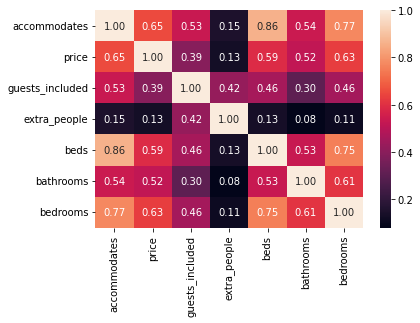

In [33]:
import seaborn as sns
sns.heatmap(X_base.corr(), annot=True, fmt=".2f");

In [34]:
# Add property_type (Categorical variable)
df_property_type_numeric = pd.get_dummies(df_listings['property_type'])
df_listings_v2 = pd.concat([df_listings, df_property_type_numeric], axis=1)
property_type_numeric_columns = list(df_property_type_numeric.columns)

In [35]:
# Add neighbourhood_group_cleansed (Categorical variable)
df_temp = pd.get_dummies(df_listings['neighbourhood_group_cleansed'])
df_listings_v2 = pd.concat([df_listings_v2, df_temp], axis=1)
df_temp_columns = list(df_temp.columns)

In [36]:
# Add room_type (Categorical variable)
df_room_type_numeric = pd.get_dummies(df_listings['room_type'])
df_listings_v2 = pd.concat([df_listings_v2, df_room_type_numeric], axis=1)
room_type_numeric_columns = list(df_room_type_numeric.columns)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# ----- Linear model
# Consider only numerical variables
X = df_listings_v2[['accommodates', 'number_of_reviews', 'bedrooms', 'bathrooms', 'beds', 'guests_included', 'extra_people'] + df_temp_columns + amenities_list + property_type_numeric_columns + room_type_numeric_columns]
y = df_listings_v2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

#Fit
lm_model.fit(X_train, y_train)

# Predict
y_test_preds = lm_model.predict(X_test) 

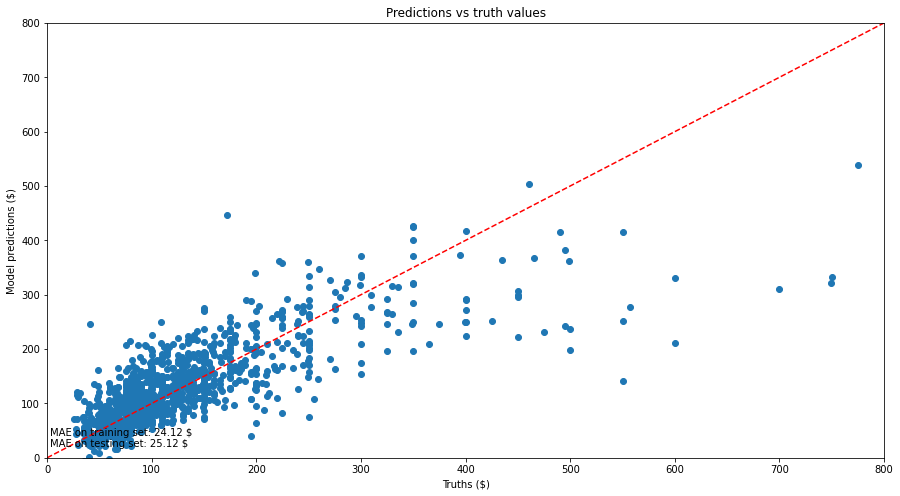

In [38]:
# Predictions versus truth values
from sklearn.metrics import median_absolute_error

width_plot = 15
height_plot = 8

y_pred = lm_model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $"
y_test_preds = lm_model.predict(X_test)
mae = median_absolute_error(y_test, y_test_preds)
string_score += f"\nMAE on testing set: {mae:.2f} $"
fig, ax = plt.subplots(figsize=(width_plot, height_plot))
plt.scatter(y_test, y_test_preds)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Predictions vs truth values")
plt.ylabel("Model predictions ($)")
plt.xlabel("Truths ($)")
plt.xlim([0, 800])
_ = plt.ylim([0, 800])

In [39]:
# Score
print("Score:", lm_model.score(X_test, y_test))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_preds))
# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_preds))

# The coefficients
default_max_rows = pd.get_option('display.max_rows')
coefs = pd.DataFrame(
    lm_model.named_steps["linearregression"].coef_,
    columns=["Coefficients"],
    index=list(X.columns),
)
pd.set_option('display.max_rows', coefs.shape[0])
print(coefs.sort_values('Coefficients', ascending=False))
pd.set_option('display.max_rows', default_max_rows)

Score: 0.5976104469058122
Mean squared error: 3445.88
Coefficient of determination: 0.60
                            Coefficients
Other neighborhoods         9.661847e+14
Capitol Hill                8.547185e+14
Downtown                    8.171234e+14
Central Area                7.047548e+14
Queen Anne                  6.159858e+14
Ballard                     5.665178e+14
West Seattle                5.377814e+14
Rainier Valley              4.757164e+14
Beacon Hill                 4.259674e+14
University District         4.189697e+14
Cascade                     3.429987e+14
Delridge                    3.248163e+14
Lake City                   3.185051e+14
Northgate                   3.185051e+14
Magnolia                    2.987093e+14
Seward Park                 2.542051e+14
Entire home/apt             2.260823e+14
Private room                2.202852e+14
Interbay                    1.213436e+14
Shared room                 8.314918e+13
bedrooms                    2.721509e+01
accommoda

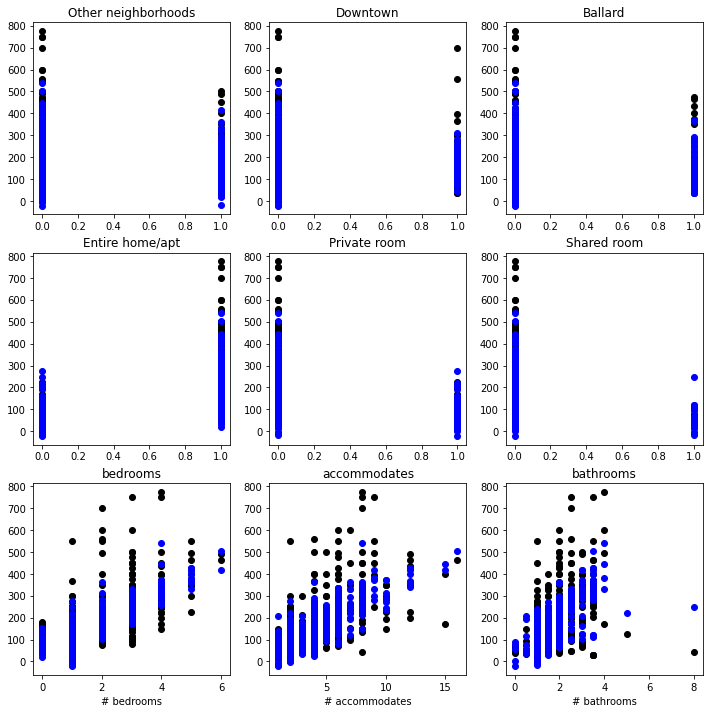

In [56]:
# Plot outputs

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

axs[0, 0].scatter(X_test['Other neighborhoods'], y_test,  color='black')
axs[0, 0].scatter(X_test['Other neighborhoods'], y_test_preds, color='blue')
axs[0, 0].set_title('Other neighborhoods')

axs[0, 1].scatter(X_test['Downtown'], y_test,  color='black')
axs[0, 1].scatter(X_test['Downtown'], y_test_preds, color='blue')
axs[0, 1].set_title('Downtown')

axs[0, 2].scatter(X_test['Ballard'], y_test,  color='black')
axs[0, 2].scatter(X_test['Ballard'], y_test_preds, color='blue')
axs[0, 2].set_title('Ballard')

axs[1, 0].scatter(X_test['Entire home/apt'], y_test,  color='black')
axs[1, 0].scatter(X_test['Entire home/apt'], y_test_preds, color='blue')
axs[1, 0].set_title('Entire home/apt')
# axs[1, 0].set(xlabel='# Entire home/apt')

axs[1, 1].scatter(X_test['Private room'], y_test,  color='black')
axs[1, 1].scatter(X_test['Private room'], y_test_preds, color='blue')
axs[1, 1].set_title('Private room')
# axs[1, 1].set(xlabel='# Private room')

axs[1, 2].scatter(X_test['Shared room'], y_test,  color='black')
axs[1, 2].scatter(X_test['Shared room'], y_test_preds, color='blue')
axs[1, 2].set_title('Shared room')
# axs[1, 2].set(xlabel='# Shared room')

axs[2, 0].scatter(X_test['bedrooms'], y_test,  color='black')
axs[2, 0].scatter(X_test['bedrooms'], y_test_preds, color='blue')
axs[2, 0].set_title('bedrooms')
axs[2, 0].set(xlabel='# bedrooms')

axs[2, 1].scatter(X_test['accommodates'], y_test,  color='black')
axs[2, 1].scatter(X_test['accommodates'], y_test_preds, color='blue')
axs[2, 1].set_title('accommodates')
axs[2, 1].set(xlabel='# accommodates')

axs[2, 2].scatter(X_test['bathrooms'], y_test,  color='black')
axs[2, 2].scatter(X_test['bathrooms'], y_test_preds, color='blue')
axs[2, 2].set_title('bathrooms')
axs[2, 2].set(xlabel='# bathrooms')

plt.show()

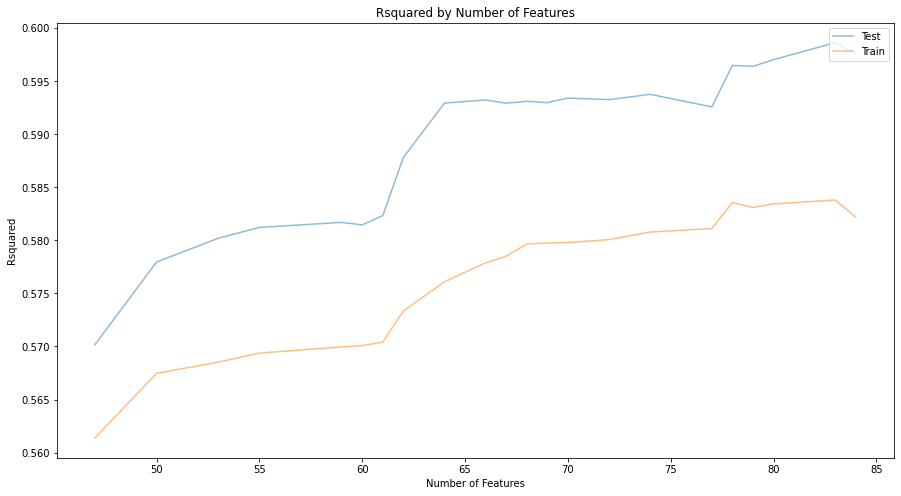

In [38]:
from utils import find_optimal_lm_mod

#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [300, 250, 200, 150, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 4, 3, 2, 1, 0]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [39]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

83
0.5986342749818437
0.5838031079406185
